In [3]:
from TopDown import *

ModuleNotFoundError: No module named 'zawadx_implementation'

In [83]:
g = 3
n = 1

num_vertices = 2 * g - 2 + n 
num_edges = 3 * g - 3 + n

2


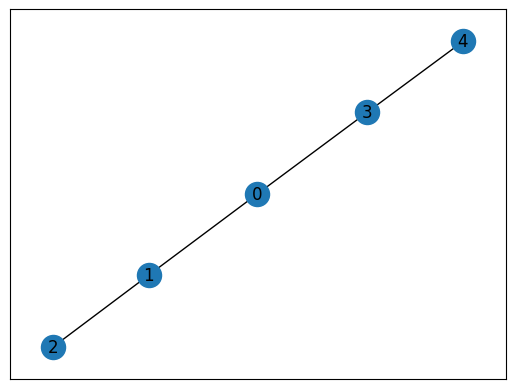

In [84]:
# user a pre-existing function to get all the trees on num_vertices many vertices. 
# We will build maximal graphs by adding edges appropriately to these. 

def get_valid_trees(n : int) -> list:
    out = []
    for T in nx.generators.nonisomorphic_trees(n):
        # get rid of trees where the degree of any vertex is > 3 (these would not be maximal)
        if any([T.degree(v) > 3 for v in T.nodes]):
            continue
        out += [nx.MultiGraph(T)]
    return out

valid_trees = get_valid_trees(num_vertices)

print(len(valid_trees))
nx.draw_networkx(valid_trees[0])

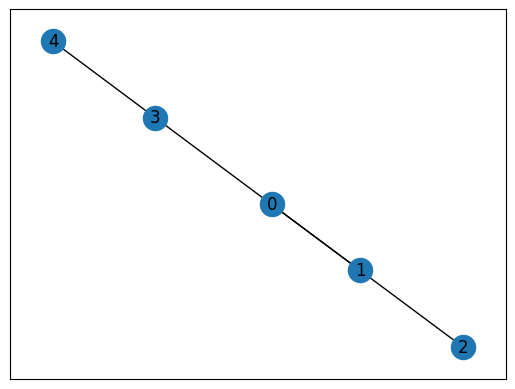

In [85]:
# Given a graph, this function returns a list of all graphs one can produce by adding in an edge
# such that the vertex degrees never go above 3
def all_ways_add_edge(G) -> list:
    output = []
    checked = []
    for v in G.nodes:
        if G.degree(v) < 2 : # self loop allowed
            for w in G.nodes:
                if w not in checked and G.degree(w) < 3:
                    tempG = G.copy()
                    tempG.add_edge(v, w)
                    # make sure we don't add duplicates
                    if not any([nx.vf2pp_is_isomorphic(tempG, otherG) for otherG in output]):
                        output += [tempG]
        elif G.degree(v) < 3: # self loop not allowed
            for w in G.nodes:
                if (w not in checked) and (w != v) and G.degree(w) < 3:
                    tempG = G.copy()
                    tempG.add_edge(v, w)
                    # make sure we don't add duplicates
                    if not any([nx.vf2pp_is_isomorphic(tempG, otherG) for otherG in output]):
                        output += [tempG]
        checked += [v]
    
    return output

out = all_ways_add_edge(valid_trees[0])
nx.draw_networkx(out[0])
# print(nx.vf2pp_is_isomorphic(out[0], out[2]))

In [86]:
# given a list of graphs, apply the above function to each, and combine all the resulting lists
# removing any duplicates
def add_edge_to_each(graphs : list) -> list: 
    out = []
    for G in graphs:
        # print(type(G))
        G_out = []
        for newG in all_ways_add_edge(G):
            if not any([nx.vf2pp_is_isomorphic(newG, older_newG) for older_newG in out]):
                G_out += [newG]
        out += G_out
    
    return out


def add_edge_n_times(graphs : list, n : int) -> list:
    for _ in range(n):
        graphs = add_edge_to_each(graphs)
    
    return graphs


num_remaining_edges = g

valid_graphs = add_edge_n_times(valid_trees, num_remaining_edges)

In [87]:
with open("top_down/max_layer_{}_{}.pkl".format(g, n), "wb") as f:
    pickle.dump(valid_graphs, f)
    

FileNotFoundError: [Errno 2] No such file or directory: 'top_down/max_layer_3_1.pkl'

In [68]:
with open("top_down/max_layer_{}_{}.pkl".format(g, n), "rb") as f:
    valid_graphs = pickle.load(f)
    

In [69]:
def add_marked_points(G):
    markings = {}
    for v in G.nodes:
        markings[v] = 3 - G.degree(v)
    return TropicalGraph(G, {}, markings)

valid_tropical_graphs = list(map(add_marked_points, valid_graphs))

12


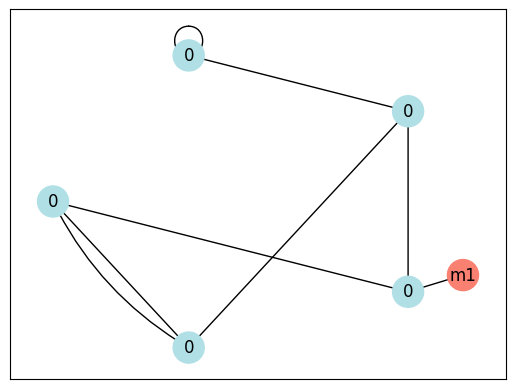

In [73]:
print(len(valid_tropical_graphs))
valid_tropical_graphs[3].draw()


True
